# Diagramas de cajas de los distintos modelos

A continuación, crearemos para cada modelo un diagrama de cajas para ver la distribución del error NME y de reconstrucción. Para esto, hemos creado un fichero denominado *boxplot.csv* en el que concatenamos los ids de todas las imágenes del conjunto de entrenamiento junto con su NME medio y su error de reconstrucción. 

En primer lugar instalamos los paquetes necesarios y creamos las variables con los paths absolutos a los ficheros y los nombres de los modelos. También almacenamos los dos tipos de errores.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

paths = ['/home/alejandro/Escritorio/5ºDGIIM/Segundo Cuatrimestre/TFG/github/3FabRec/data/Outputs/BaseModel_Definitivo/boxplot.csv','/home/alejandro/Escritorio/5ºDGIIM/Segundo Cuatrimestre/TFG/github/3FabRec/data/Outputs/Encoder/boxplot.csv', '/home/alejandro/Escritorio/5ºDGIIM/Segundo Cuatrimestre/TFG/github/3FabRec/data/Outputs/Decoder/boxplot.csv', '/home/alejandro/Escritorio/5ºDGIIM/Segundo Cuatrimestre/TFG/github/3FabRec/data/Outputs/DataAugmentation/boxplot.csv']
models_titles=["Modelo base", "Encoder", "Decoder", "Data Augmentation"]
errors=["media_nme","error_de_reconstruccion"]

Vamos a crear ahora las funciones que generan el Boxplot junto con el cálculo de la Media, los cuartiles y el rango intercuartílico.

In [2]:
def Boxplot(model, title):
    # Definimos un grid de una fila y dos imágenes
    fig1, ax1 = plt.subplots(1,2)
    # Ajustamos las dimensiones para correcta visualización
    fig1.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=2)
    # Dibujamos el primer boxplot
    ax1[0].set_title('NME por imagen ' + title)
    ax1[0].set_ylabel("NME")
    ax1[0].boxplot(model["media_nme"],showfliers=False)
    ax1[0].set_xticks([1],labels=[title], minor=False)
    # Dibujamos el segundo boxplot
    ax1[1].set_title('Error de reconstrucción por imagen ' + title)
    ax1[1].set_ylabel("Error Reconstrucción")
    ax1[1].boxplot(model["error_de_reconstruccion"],showfliers=False)
    ax1[1].set_xticks([1],labels=[title], minor=False)

def Metrics(model,error):
    # Calculamos primer cuartil
    q1 = np.quantile(model[error], 0.25)
    # Calculamos tercer cuartil
    q3 = np.quantile(model[error], 0.75)
    # Calculamos mediana
    med = np.median(model[error])
    # Calculamos media
    mean = np.mean(model[error])
    # Calculamos Rango Intercuartílico
    iqr = q3-q1

    # Calculamos las cotas superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    # Mostramos las métricas
    print(error)
    print("Primer cuartil: ", q1)
    print("Mediana: ",med)
    print("Tercer cuartil: ",q3)
    print("Rango intercuartílico: ", iqr)
    print("Media: ", mean)
    print()
    # Outliers 
    outliers = model[error][(model[error] <= lower_bound) | (model[error] >= upper_bound)]
    print('The following are the outliers in the boxplot:\n{}'.format(outliers))
    print('Total Outliers:{}'.format(outliers.size))


Leemos los datos de cada fichero y los almacenamos en una lista de modelos:

In [3]:
models = []
for i in range(4):
    model = pd.read_csv(paths[i])
    models.append(model)


## Boxplots
Generamos los boxplots

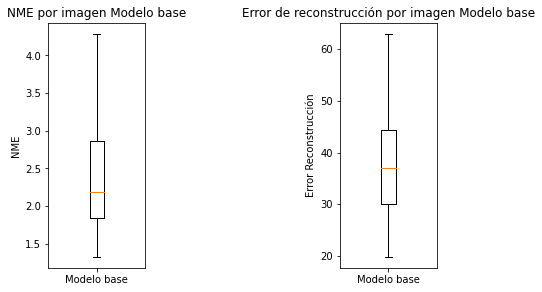

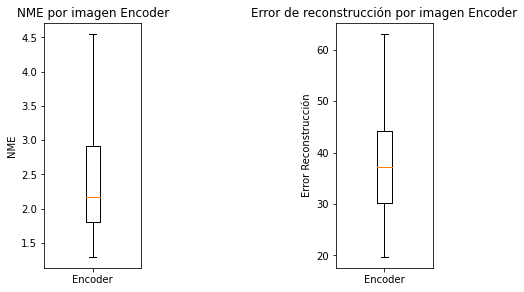

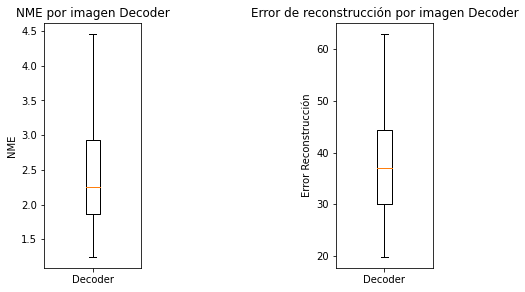

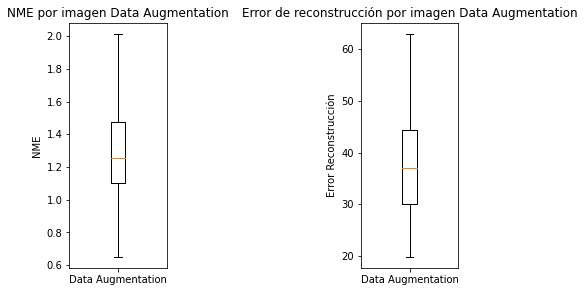

In [4]:
for i in range(4):
    Boxplot(models[i],models_titles[i])

## Metricas

Calculamos para cada modelo las métricas:

In [5]:

for i in range(4):
    print()
    print(models_titles[i])
    for j in range(2):  
        Metrics(models[i],errors[j])


Modelo base
media_nme
Primer cuartil:  1.839
Mediana:  2.18
Tercer cuartil:  2.8605
Rango intercuartílico:  1.0215
Media:  2.974343511450382

The following are the outliers in the boxplot:
24      4.623
36      4.873
40     12.051
52      6.354
54     13.296
57      4.780
82      5.085
93      8.079
104     4.771
107     8.494
116    13.343
118    31.908
Name: media_nme, dtype: float64
Total Outliers:12
error_de_reconstruccion
Primer cuartil:  30.0245
Mediana:  37.104
Tercer cuartil:  44.382000000000005
Rango intercuartílico:  14.357500000000005
Media:  38.04381679389313

The following are the outliers in the boxplot:
68    72.624
69    69.777
97    73.033
Name: error_de_reconstruccion, dtype: float64
Total Outliers:3

Encoder
media_nme
Primer cuartil:  1.804
Mediana:  2.163
Tercer cuartil:  2.912
Rango intercuartílico:  1.1079999999999999
Media:  2.9784885496183207

The following are the outliers in the boxplot:
2       4.700
24      4.686
40     12.066
52      7.060
54     12.688
82

## Boxplot conjunto

Generamos boxplot final conjunto:

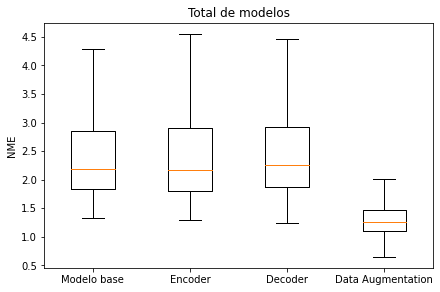

In [6]:
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.8, wspace=0.8)
ax1.set_title('Total de modelos')
ax1.set_ylabel("NME")
ax1.boxplot([models[0]["media_nme"],models[1]["media_nme"],models[2]["media_nme"],models[3]["media_nme"]],showfliers=False)
ax1.set_xticks([1,2,3,4],models_titles)

# Test de Hipótesis Kolmogorov Smirnov

A continuación realizaremos un test de hipótesis en el cual veremos si dados dos conjuntos de ejemplos independientes proceden de la misma distribución o no ($H_0$). Usaremos un valor de confianza del $95/%$ por lo que si se obtiene un $p-valor < 0.05$ rechazaremos la hipótesis nula.

Los datos empleados son las medias del NME por landmark obtenidas en el conjunto de Test y de Validación.

In [7]:
from scipy import stats


data=pd.read_csv('./testKolmogorvSmirnov.csv')

sample1=list(data['Test'])
sample2=list(data['Validacion'])
stats.ks_2samp(sample1, sample2)


KstestResult(statistic=0.2, pvalue=0.5940706297759378)

Como el $p-valor=0.594 > 0.05$ no tenemos evidencias para rechazarla hipótesis nula, por lo que no podemos descartar que los valores no procedan de la misma distribución.